In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

def season_category(x):
    if x == 1:
        return 'season_1'
    elif x == 2:
        return 'season_2'
    elif x == 3:
        return 'season_3'
    else:
        return 'season_4'

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_1048/1405490331.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Reading the dataset

In [3]:
df = pd.read_csv('BRSM_Assignment_Datasets.csv')
data = df
print(df.head())
print()
print("Columns are given by:")
print(df.columns)
alpha = 0.05

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Columns are given by:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


#### Shape of the dataset

In [4]:
df.shape

(10886, 12)

##### Converting the datatype of datetime column from object to datetime

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['season'] = df['season'].apply(season_category)

In [7]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')
df['temp'] = df['temp'].astype('float32')
df['atemp'] = df['atemp'].astype('float32')
df['humidity'] = df['humidity'].astype('float32')
df['windspeed'] = df['windspeed'].astype('float32')
df['casual'] = df['casual'].astype('int32')
df['registered'] = df['registered'].astype('int32')
df['count'] = df['count'].astype('int32')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  float32       
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int32         
 10  registered  10886 non-null  int32         
 11  count       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float32(4), int32(3)
memory usage: 426.0 KB


In [9]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.230862,23.655085,61.886459,12.799396,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000
std,NaN,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


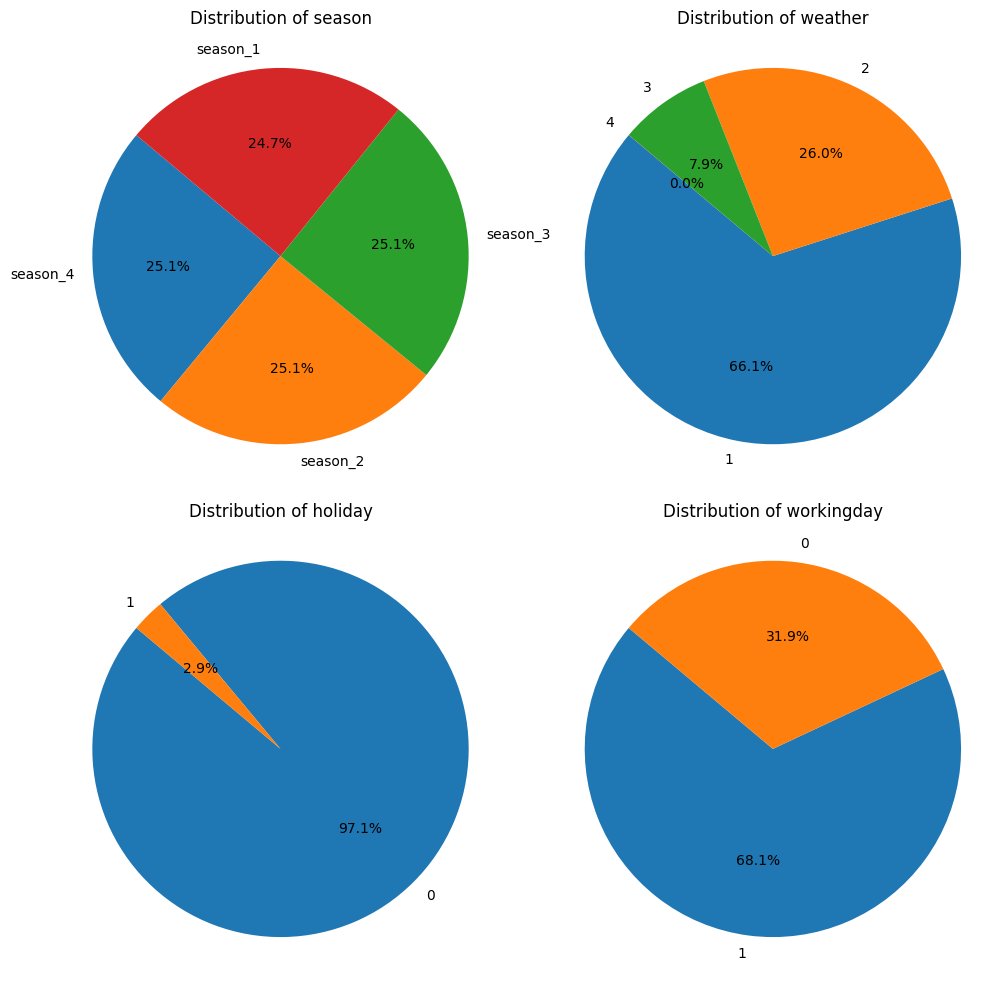

In [10]:
def plot_categorical_distribution(df, column, subplot_index):
    column_distribution = df[column].value_counts().reset_index()
    column_distribution.columns = [column, 'count']
    plt.subplot(subplot_index)
    plt.pie(column_distribution['count'], labels=column_distribution[column], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plot_categorical_distribution(df, 'season', 221)

plt.subplot(2, 2, 2)
plot_categorical_distribution(df, 'weather', 222)

plt.subplot(2, 2, 3)
plot_categorical_distribution(df, 'holiday', 223)

plt.subplot(2, 2, 4)
plot_categorical_distribution(df, 'workingday', 224)

plt.tight_layout()
plt.show()

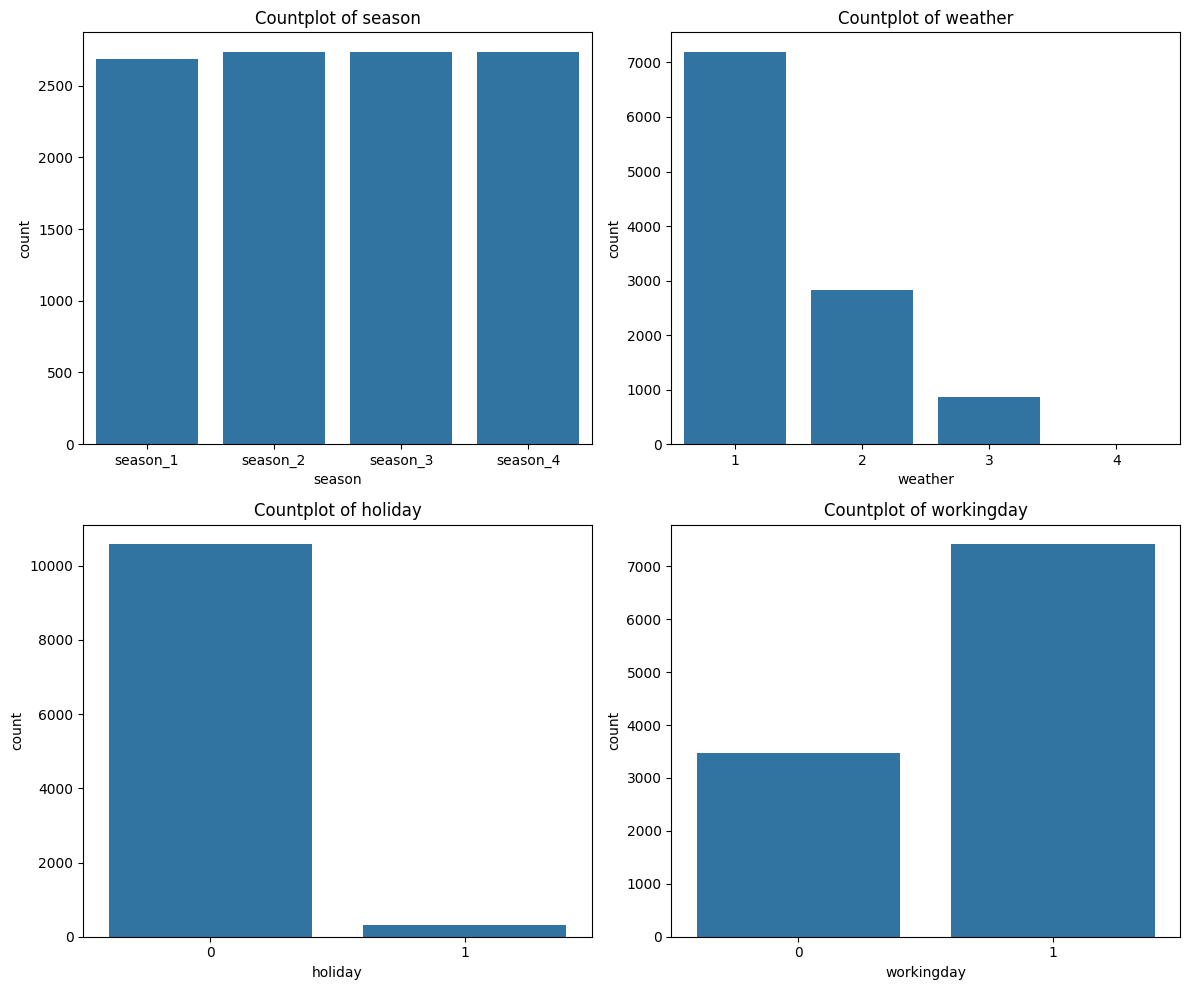

In [11]:
def plot_countplot(df, column, subplot_index):
    plt.subplot(subplot_index)
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plot_countplot(df, 'season', 221)

plt.subplot(2, 2, 2)
plot_countplot(df, 'weather', 222)

plt.subplot(2, 2, 3)
plot_countplot(df, 'holiday', 223)

plt.subplot(2, 2, 4)
plot_countplot(df, 'workingday', 224)

plt.tight_layout()
plt.show()


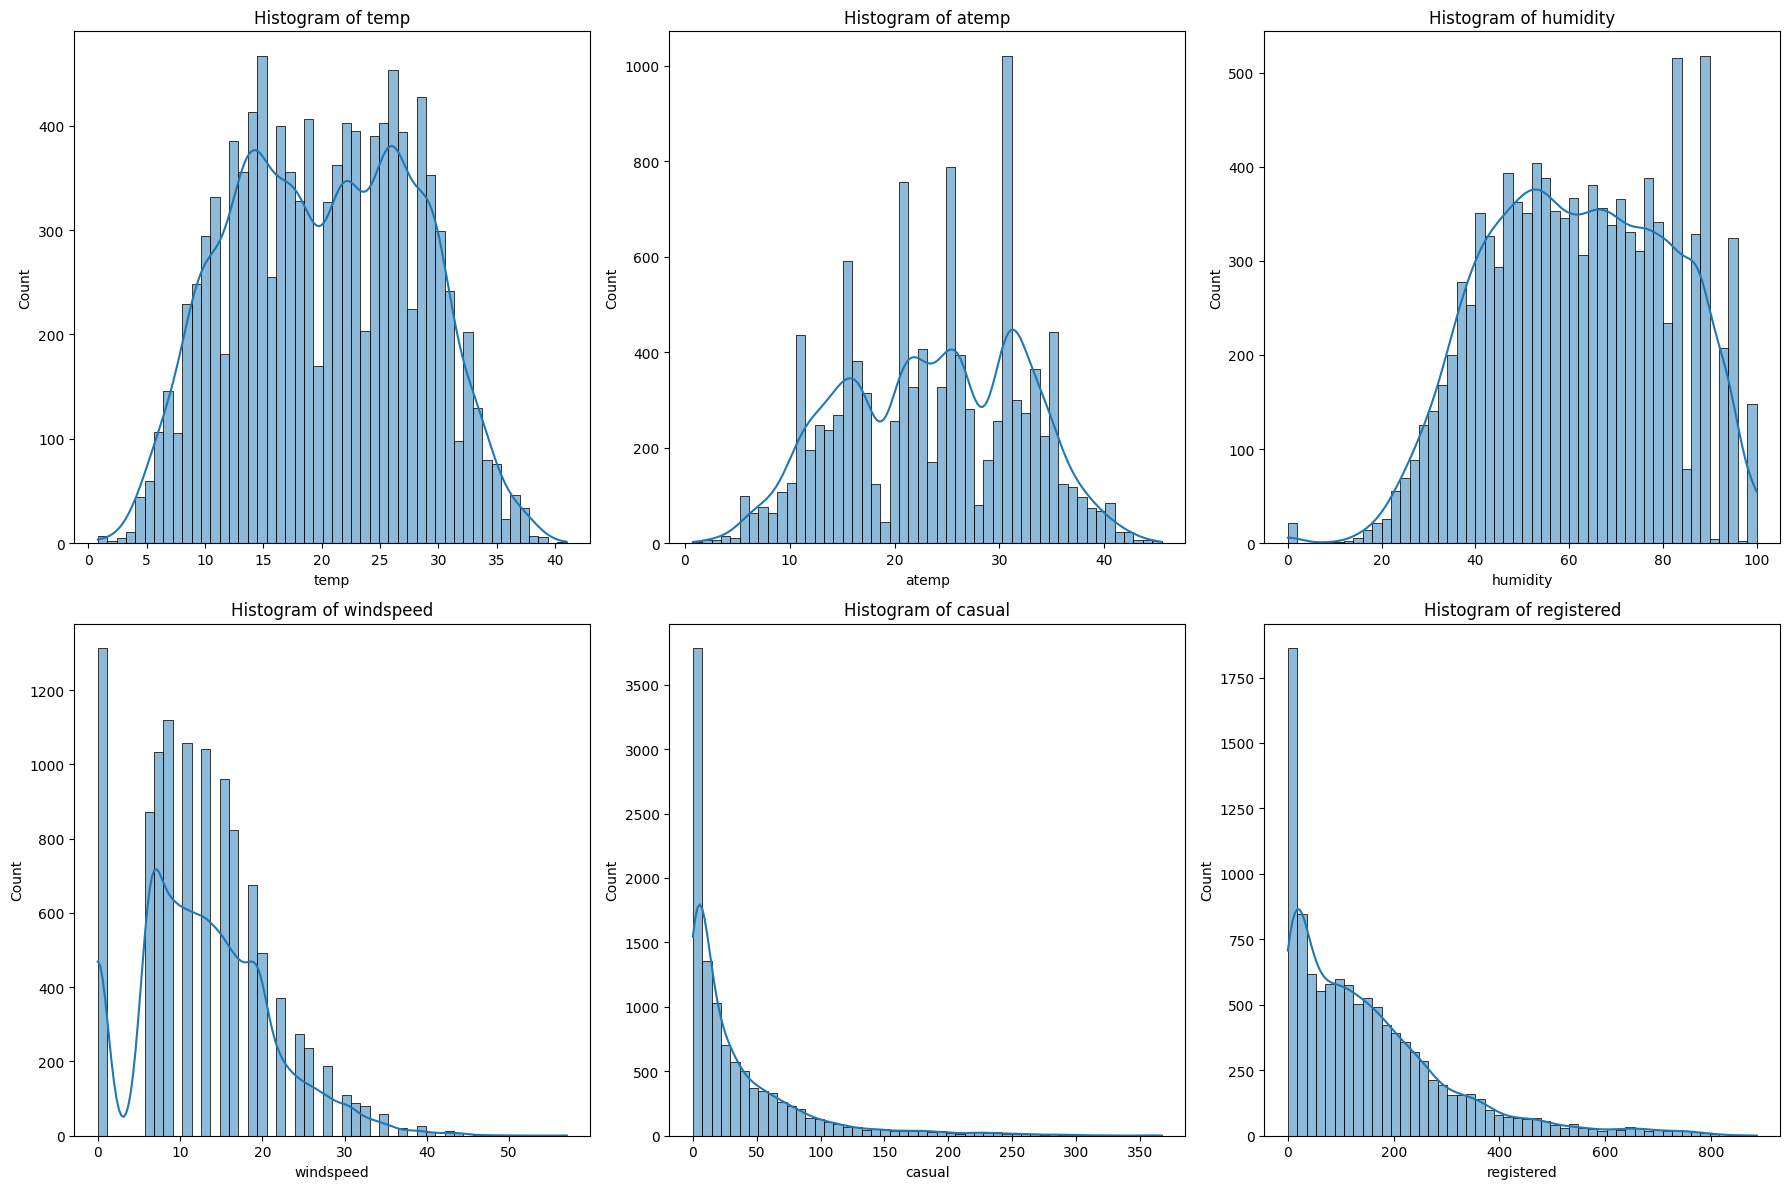

In [12]:
def plot_histplot(df, column, subplot_index):
    plt.subplot(subplot_index)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Histogram of {column}')

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plot_histplot(df, 'temp', 231)

plt.subplot(2, 3, 2)
plot_histplot(df, 'atemp', 232)

plt.subplot(2, 3, 3)
plot_histplot(df, 'humidity', 233)

plt.subplot(2, 3, 4)
plot_histplot(df, 'windspeed', 234)

plt.subplot(2, 3, 5)
plot_histplot(df, 'casual', 235)

plt.subplot(2, 3, 6)
plot_histplot(df, 'registered', 236)

plt.tight_layout()
plt.show()


## Does the presence of a working day influence the quantity of electric cycles rented ?

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of electric cycles rented. 

  * **Alternate Hypothesis ( HA )** - Working Day has some effect on the number of electric cycles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

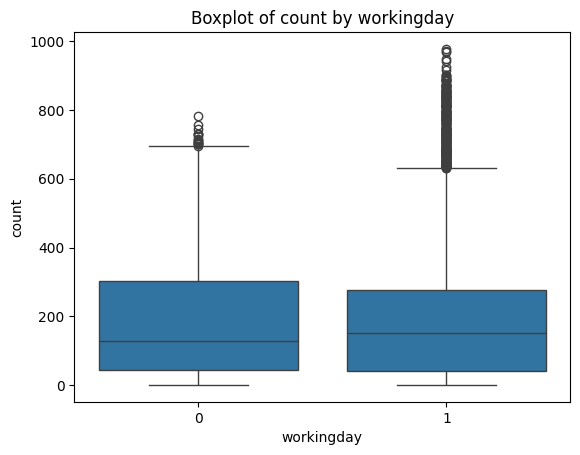

In [13]:
def plot_boxplot(df, x_column, y_column):
    sns.boxplot(data=df, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.show()


plot_boxplot(df, 'workingday', 'count')

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

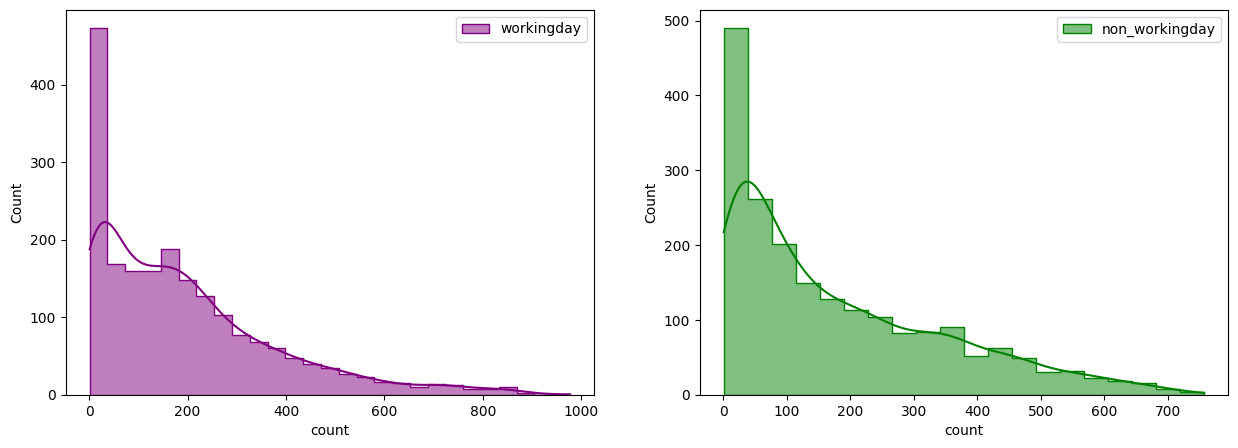

In [14]:
def plot_workingday_comparison_hist(df, column, sample_size=2000):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df.loc[df['workingday'] == 1, column].sample(sample_size),
                 element='step', color='purple', kde=True, label='workingday')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.histplot(df.loc[df['workingday'] == 0, column].sample(sample_size),
                 element='step', color='green', kde=True, label='non_workingday')
    plt.legend()
    
    plt.show()

plot_workingday_comparison_hist(df, 'count')

  ```
  Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

***Assessing distribution via QQ Plot***

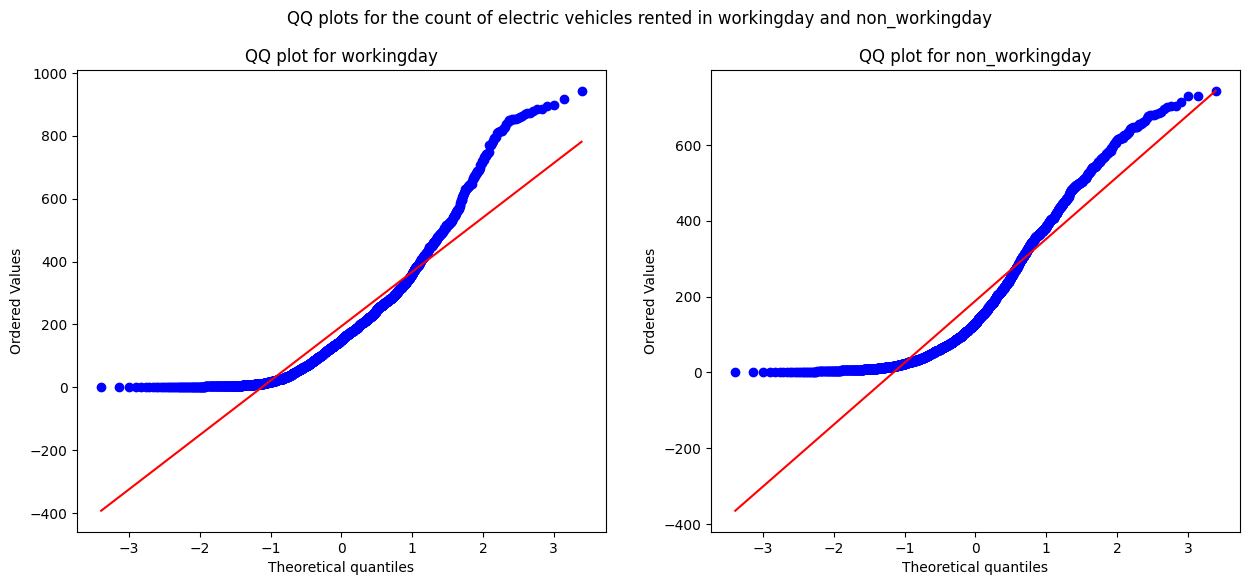

In [15]:
def qq_plot_workingday_comparison(df, column, sample_size=2000):
    plt.figure(figsize=(15, 6))
    plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')

    plt.subplot(1, 2, 1)
    stats.probplot(df.loc[df['workingday'] == 1, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for workingday')

    plt.subplot(1, 2, 2)
    stats.probplot(df.loc[df['workingday'] == 0, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for non_workingday')

    plt.show()

qq_plot_workingday_comparison(df, 'count')

  ```
  In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

#### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [16]:
def shapiro_test_normality(data, column, condition_column, condition_value, sample_size=2000, alpha=0.05):
    sample = data.loc[data[condition_column] == condition_value, column].sample(sample_size)
    test_stat, p_value = stats.shapiro(sample)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow a normal distribution')
    else:
        print('The sample follows a normal distribution')

print("Workingday")
shapiro_test_normality(df, 'count', 'workingday', 1)
print()
print("Non-Workingday")
shapiro_test_normality(df, 'count', 'workingday', 0)

Workingday
p-value: 4.0163879092198165e-38
The sample does not follow a normal distribution

Non-Workingday
p-value: 2.752011871307921e-36
The sample does not follow a normal distribution


***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution.***

In [17]:
def boxcox_shapiro_test_normality(data, column, condition_column, condition_value, alpha=0.05):
    transformed_data = stats.boxcox(data.loc[data[condition_column] == condition_value, column])[0]
    test_stat, p_value = stats.shapiro(transformed_data)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow a normal distribution')
    else:
        print('The sample follows a normal distribution')

print("Workingday")
boxcox_shapiro_test_normality(df, 'count', 'workingday', 1)
print()
print("Non-Workingday")
boxcox_shapiro_test_normality(df, 'count', 'workingday', 0)


Workingday
p-value: 1.606449722752868e-33
The sample does not follow a normal distribution

Non-Workingday
p-value: 8.140929444965395e-24
The sample does not follow a normal distribution


/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_1048/1579685415.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  test_stat, p_value = stats.shapiro(transformed_data)


Workingday: ***The sample does not follow a normal distribution (p < 0.05)***

Non-Workingday: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Both samples fail the test for normality.

Despite applying the Box-Cox transformation to both the "workingday" and "non_workingday" datasets, neither conforms to a normal distribution.

```
As the samples do not exhibit a normal distribution, the application of the T-Test is inappropriate. Instead, we can utilize its non-parametric counterpart, the Mann-Whitney U rank test, for comparison between two independent samples.
```

##### Ho : Mean number of electric cycles rented is the same for working and non-working days
##### Ha : Mean number of electric cycles rented is not the same for working and non-working days
##### Assuming a significance level of 0.05
##### Test statistics: Mann-Whitney U rank test for two independent samples


In [18]:
import scipy.stats as stats

def mann_whitney_test(df, column, condition_column, condition_value, alpha=0.05):
    test_stat, p_value = stats.mannwhitneyu(df.loc[df[condition_column] == condition_value, column],
                                             df.loc[df[condition_column] != condition_value, column])
    print('P-value:', p_value)
    if p_value < alpha:
        print('Mean number of electric cycles rented is not the same for working and non-working days')
    else:
        print('Mean number of electric cycles rented is the same for working and non-working days')


mann_whitney_test(df, 'count', 'workingday', 1)


P-value: 0.9679139953914079
Mean number of electric cycles rented is the same for working and non-working days


##### Hence, there is no statistically significant difference in the mean hourly count of total rental bikes between working and non-working days.

## Does the presence of holidays affect the number of electric cycles rented?

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Holidays have no effect on the number of electric vehicles rented

  * **Alternate Hypothesis ( HA )** - Holidays has some effect on the number of electric vehicles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

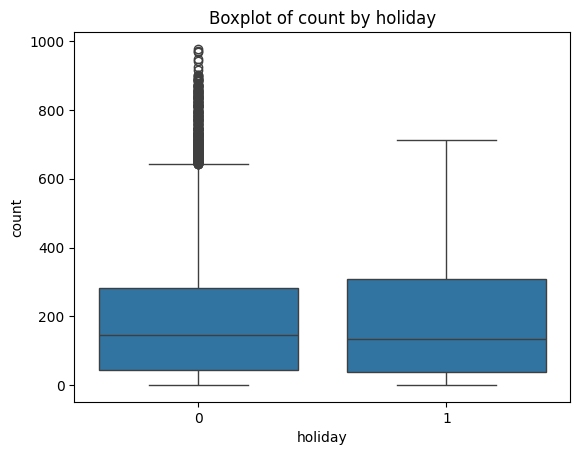

In [19]:
def plot_boxplot(df, x_column, y_column):
    sns.boxplot(data=df, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.show()


plot_boxplot(df, 'holiday', 'count')

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

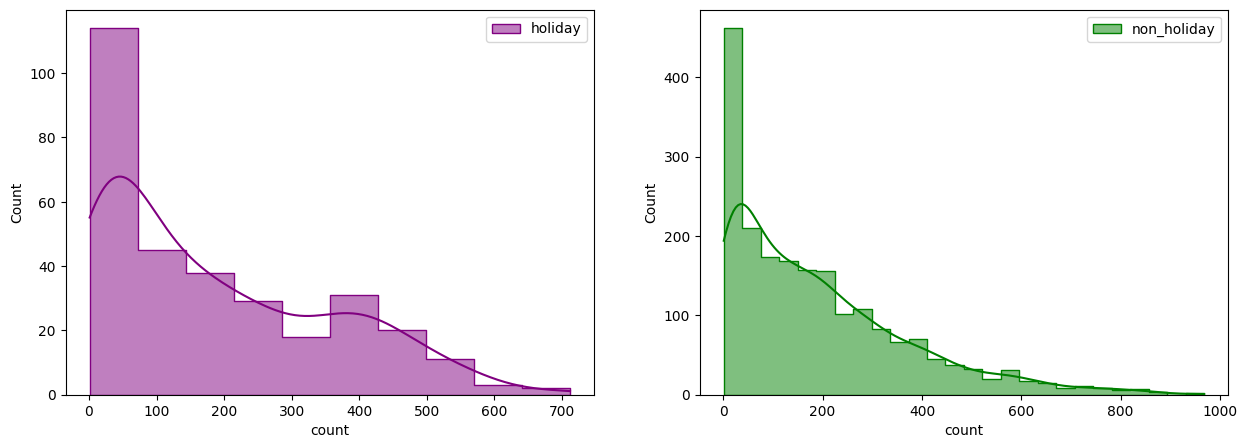

In [20]:
def plot_holiday_comparison_hist(df, column, sample_size=2000):
    holiday_sample = df.loc[df['holiday'] == 1, column]
    non_holiday_sample = df.loc[df['holiday'] == 0, column]

    if sample_size > len(holiday_sample):
        holiday_sample_size = len(holiday_sample)
    else:
        holiday_sample_size = sample_size

    if sample_size > len(non_holiday_sample):
        non_holiday_sample_size = len(non_holiday_sample)
    else:
        non_holiday_sample_size = sample_size

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(holiday_sample.sample(holiday_sample_size, replace=False),
                 element='step', color='purple', kde=True, label='holiday')
    plt.legend()
    plt.subplot(1, 2, 2)
    sns.histplot(non_holiday_sample.sample(non_holiday_sample_size, replace=False),
                 element='step', color='green', kde=True, label='non_holiday')
    plt.legend()
    plt.show()

plot_holiday_comparison_hist(df, 'count')

  ```
  Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

***Assessing distribution via QQ Plot***

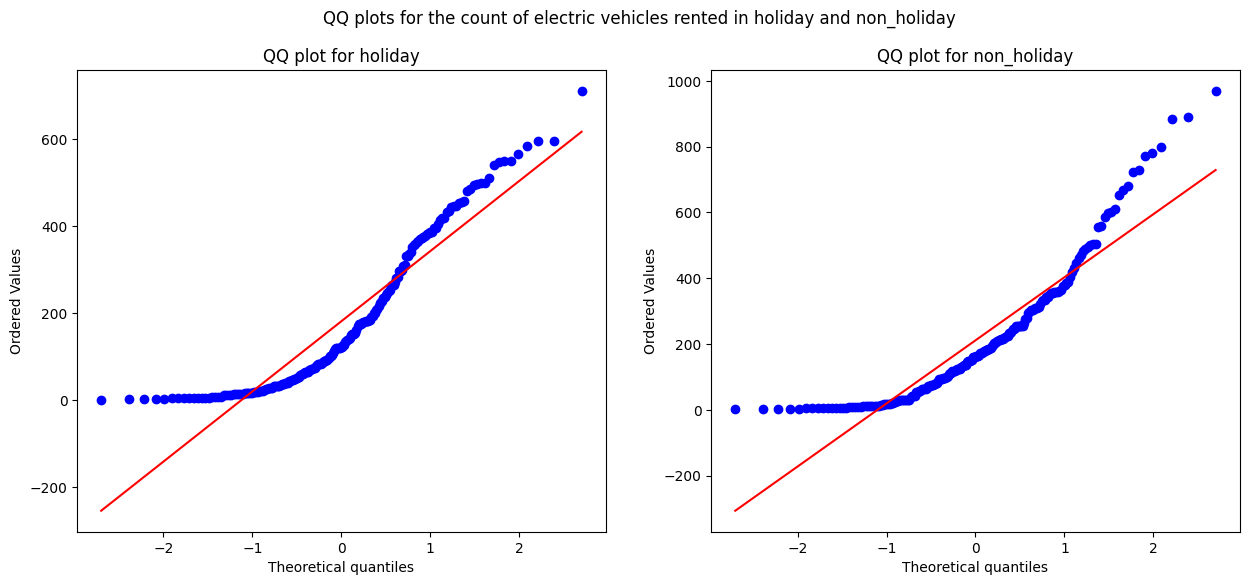

In [21]:
def plot_qq_holiday_comparison(df, column, sample_size=200):
    plt.figure(figsize=(15, 6))
    plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')

    plt.subplot(1, 2, 1)
    stats.probplot(df.loc[df['holiday'] == 1, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for holiday')

    plt.subplot(1, 2, 2)
    stats.probplot(df.loc[df['holiday'] == 0, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for non_holiday')

    plt.show()

plot_qq_holiday_comparison(df, 'count')

  ```
  In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

#### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [22]:
def shapiro_test_holiday(df, column, holiday_value, alpha=0.05, sample_size=200):
    sample = df.loc[df['holiday'] == holiday_value, column].sample(sample_size)
    test_stat, p_value = stats.shapiro(sample)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

print('Holiday')
shapiro_test_holiday(df, 'count', 1)
print()
print('Non-Holiday')
shapiro_test_holiday(df, 'count', 0)

Holiday
p-value: 2.5030589393668234e-11
The sample does not follow normal distribution

Non-Holiday
p-value: 1.1256810827236564e-09
The sample does not follow normal distribution


***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution.***

In [23]:
def boxcox_shapiro_test_holiday(df, column, holiday_value, alpha=0.05):
    transformed_data = stats.boxcox(df.loc[df['holiday'] == holiday_value, column])[0]
    test_stat, p_value = stats.shapiro(transformed_data)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

print('Holiday')
boxcox_shapiro_test_holiday(df, 'count', 1)
print()
print('Non-Holiday')
boxcox_shapiro_test_holiday(df, 'count', 0)

Holiday
p-value: 2.134933458313291e-07
The sample does not follow normal distribution

Non-Holiday
p-value: 1.411562913878583e-36
The sample does not follow normal distribution


/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_1048/764229625.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10575.
  test_stat, p_value = stats.shapiro(transformed_data)


Holiday: ***The sample does not follow a normal distribution (p < 0.05)***

Non-Holiday: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Both samples fail the test for normality.

Despite employing the Box-Cox transformation on both the "holiday" and "non-holiday" datasets, the samples do not conform to a normal distribution.***

```
As the samples do not exhibit a normal distribution, the application of the T-Test is not appropriate. Instead, we can conduct its non-parametric equivalent test, namely the Mann-Whitney U rank test, for two independent samples.
```

##### Ho : Number of electric cycles rented is similar for holidays and non-holidays
##### Ha : Number of electric cycles rented is not similar for holidays and non-holidays days
##### Assuming significance level to be 0.05
##### Test statistics : Mann-Whitney U rank test for two independent samples


In [29]:
def mann_whitney_holiday_test(df, column, alpha=0.05, sample_size=200):
    test_stat, p_value = stats.mannwhitneyu(df.loc[df['holiday'] == 0, column].sample(sample_size),
                                             df.loc[df['holiday'] == 1, column].sample(sample_size))
    print('P-value:', p_value)
    if p_value < alpha:
        print('Number of electric cycles rented is not similar for holidays and non-holidays days')
    else:
        print('Number of electric cycles rented is similar for holidays and non-holidays')


mann_whitney_holiday_test(df, 'count')

P-value: 0.5034632466025328
Number of electric cycles rented is similar for holidays and non-holidays


##### Thus, the quantity of electric cycles rented shows statistical similarity between holidays and non-holidays.

## Does the number of rented cycles remain consistent or vary across different weather conditions?

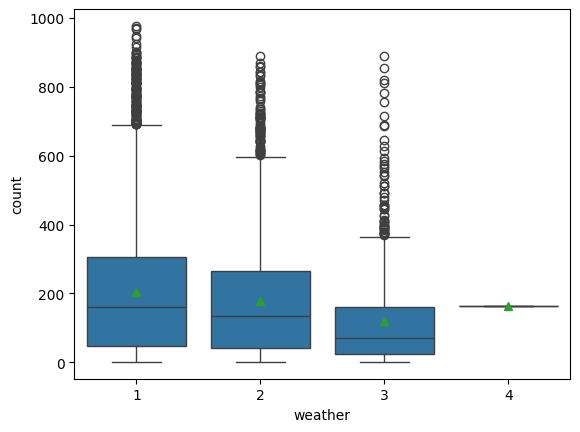

len(df_weather1) =  7192
len(df_weather2) =  2834
len(df_weather3) =  859
len(df_weather4) =  1


In [31]:
def plot_boxplot_weather(df):
    sns.boxplot(data=df, x='weather', y='count', showmeans=True)
    plt.show()

plot_boxplot_weather(df)
df_weather1 = df.loc[df['weather'] == 1]
print("len(df_weather1) = ", len(df_weather1))
df_weather2 = df.loc[df['weather'] == 2]
print("len(df_weather2) = ", len(df_weather2))
df_weather3 = df.loc[df['weather'] == 3]
print("len(df_weather3) = ", len(df_weather3))
df_weather4 = df.loc[df['weather'] == 4]
print("len(df_weather4) = ", len(df_weather4))

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. 
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
Normality check using **QQ Plot**. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

Homogeneity of Variances using **Levene's test**

Each observations are **independent**.

***STEP-3***: Define **Test statistics**

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB / MSW**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed f-test**

***STEP-5***: Compute the **p-value** and fix value of alpha.

---
we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our **alpha to be 0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0. 
* **p-val > alpha** : Accept H0 
* **p-val < alpha** : Reject H0

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

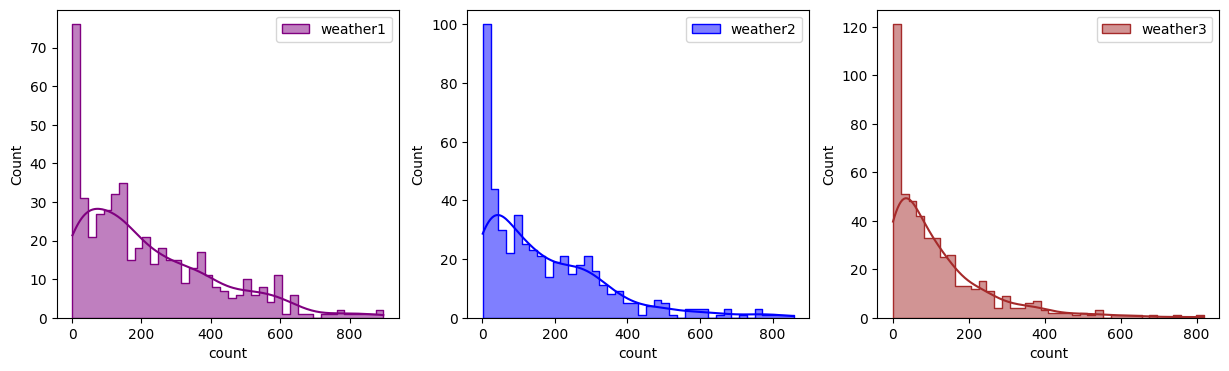

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histplot_weather(df_weather1, df_weather2, df_weather3, sample_size=500):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df_weather1.loc[:, 'count'].sample(sample_size), bins=40, 
                 element='step', color='purple', kde=True, label='weather1')
    plt.legend()
    plt.subplot(1, 3, 2)
    sns.histplot(df_weather2.loc[:, 'count'].sample(sample_size), bins=40,
                 element='step', color='blue', kde=True, label='weather2')
    plt.legend()
    plt.subplot(1, 3, 3)
    sns.histplot(df_weather3.loc[:, 'count'].sample(sample_size), bins=40,
                 element='step', color='brown', kde=True, label='weather3')
    plt.legend()
    plt.show()

plot_histplot_weather(df_weather1, df_weather2, df_weather3)

```
Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
```

***Assessing distribution via QQ Plot***

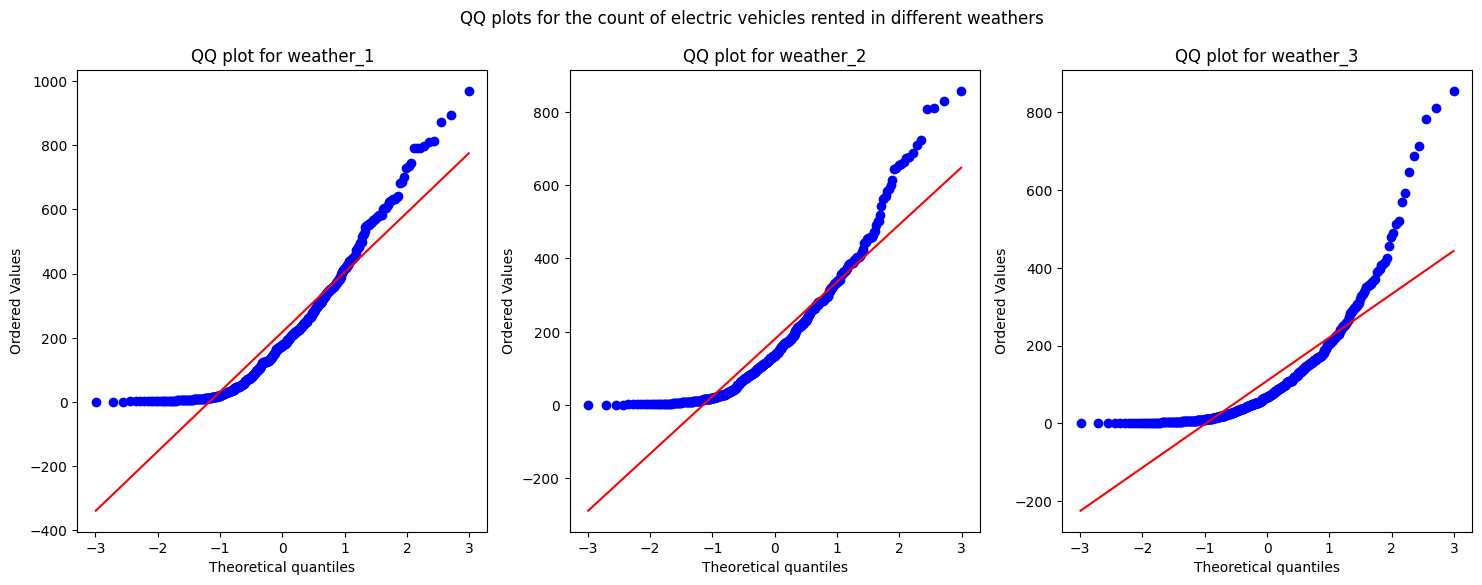

In [37]:
def plot_qq_weather(df_weather1, df_weather2, df_weather3, sample_size=500):
    plt.figure(figsize=(18, 6))
    plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')

    plt.subplot(1, 3, 1)
    stats.probplot(df_weather1.loc[:, 'count'].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for weather_1')

    plt.subplot(1, 3, 2)
    stats.probplot(df_weather2.loc[:, 'count'].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for weather_2')

    plt.subplot(1, 3, 3)
    stats.probplot(df_weather3.loc[:, 'count'].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for weather_3')

    plt.show()

plot_qq_weather(df_weather1, df_weather2, df_weather3)

```
In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
```

#### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [43]:
def shapiro_test_weather(df_weather, sample_size=500):
    for i, df in enumerate(df_weather, start=1):
        test_stat, p_value = stats.shapiro(df.loc[:, 'count'].sample(sample_size))
        print(f'Weather {i}:')
        print('P-value:', p_value)
        if p_value < 0.05:
            print('The sample does not follow normal distribution')
        else:
            print('The sample follows normal distribution')
        print()

shapiro_test_weather([df_weather1, df_weather2, df_weather3])

Weather 1:
P-value: 1.8191379984828924e-16
The sample does not follow normal distribution

Weather 2:
P-value: 2.7930345013398666e-18
The sample does not follow normal distribution

Weather 3:
P-value: 1.9702839833218854e-24
The sample does not follow normal distribution



***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution***

In [46]:
def boxcox_shapiro_test_weather(df_weather, sample_size=500):
    for i, df in enumerate(df_weather, start=1):
        df_size = len(df.loc[:, 'count'])
        if sample_size > df_size:
            sample_size = df_size
            print(f"Sample size reduced to {sample_size} due to population size limitation.")
            
        transformed_data = stats.boxcox(df.loc[:, 'count'].sample(sample_size, replace=True))[0]
        test_stat, p_value = stats.shapiro(transformed_data)
        print(f'Weather {i}:')
        print('P-value:', p_value)
        if p_value < 0.05:
            print('The sample does not follow normal distribution')
        else:
            print('The sample follows normal distribution')
        print()

boxcox_shapiro_test_weather([df_weather1, df_weather2, df_weather3])

Weather 1:
P-value: 7.316694436655711e-07
The sample does not follow normal distribution

Weather 2:
P-value: 5.395590766062207e-07
The sample does not follow normal distribution

Weather 3:
P-value: 4.0484794439107964e-05
The sample does not follow normal distribution



Weather 1: ***The sample does not follow a normal distribution (p < 0.05)***

Weather 2: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Weather 3: ***Likewise, the sample does not follow a normal distribution (p < 0.05)***

All weather samples fail the test for normality.

```
Due to the samples' lack of normal distribution and unequal variance, the f_oneway test cannot be applied. Instead, we can conduct its non-parametric equivalent test, the Kruskal-Wallis H-test for independent samples
```

##### Ho : Mean no. of cycles rented is same for different weather
##### Ha : Mean no. of cycles rented is different for different weather
##### Assuming significance Level to be 0.05


In [47]:
import numpy as np
import scipy.stats as stats

def kruskal_wallis_test_weather(df_weather1, df_weather2, df_weather3, alpha=0.05):
    test_stat, p_value = stats.kruskal(df_weather1, df_weather2, df_weather3)  
    print('Test Statistic =', test_stat)
    print('p value =', p_value)
    p_value = np.mean(p_value)
    if p_value < alpha:
        print('Reject Null Hypothesis')
    else:
        print('Failed to reject Null Hypothesis')

kruskal_wallis_test_weather(df_weather1, df_weather2, df_weather3)

Test Statistic = [1.36471292e+01 1.83091584e+00 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02]
p value = [1.08783632e-03 4.00333264e-01 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45]
Reject Null Hypothesis


##### Hence, there is a statistically significant difference in the average number of rental bikes across varying weather conditions.

### Is the number of cycles rented is similar or different in different season ?

In [41]:
df_season_1 = df.loc[df['season'] == 'season_1', 'count']
df_season_2 = df.loc[df['season'] == 'season_2', 'count']
df_season_3 = df.loc[df['season'] == 'season_3', 'count']
df_season_4 = df.loc[df['season'] == 'season_4', 'count']
len(df_season_1), len(df_season_2), len(df_season_3), len(df_season_4)

(2686, 2733, 2733, 2734)

[]

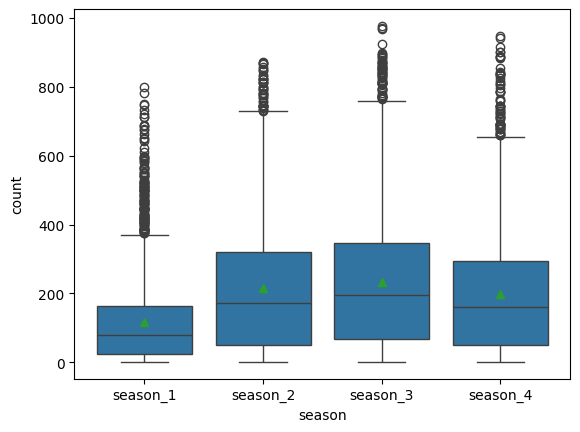

In [39]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for season 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is different for season 1,2,3 and 4.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
1. **Normality check** using QQ Plot. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

2. Homogeneity of Variances using **Levene's test**
3. Each observations are **independent**.

***STEP-3***: Define Test statistics

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different. 

**F=MSB/MSW**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed f-test**

***STEP-5***: Compute the p-value and fix value of alpha.

---

we will be computing the anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.
p-val > alpha : Accept H0
p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. 

Specifically, it tests the null hypothesis (H0):

***µ1 = µ2 = µ3 = ..... = µk***


where, µ = group mean and k = number of groups. 

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

***Visual Tests to know if the samples follow normal distribution***

[]

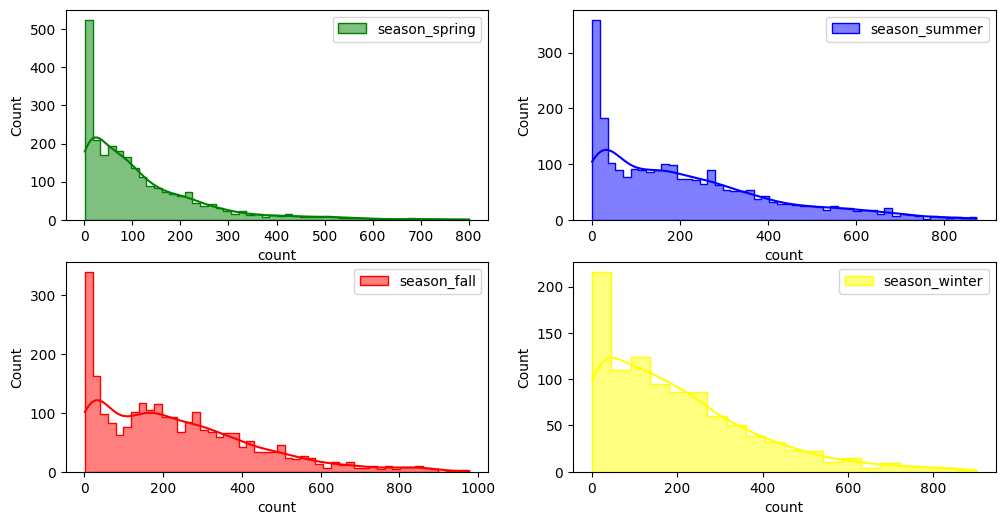

In [220]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_1.sample(2500), bins = 50, 
             element = 'step', color = 'green', kde = True, label = 'season_1')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_2.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_2')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_3.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_3')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_4.sample(1000), bins = 20,
             element = 'step', color = 'yellow', kde = True, label = 'season_4')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

Sample size for spring season: 2686


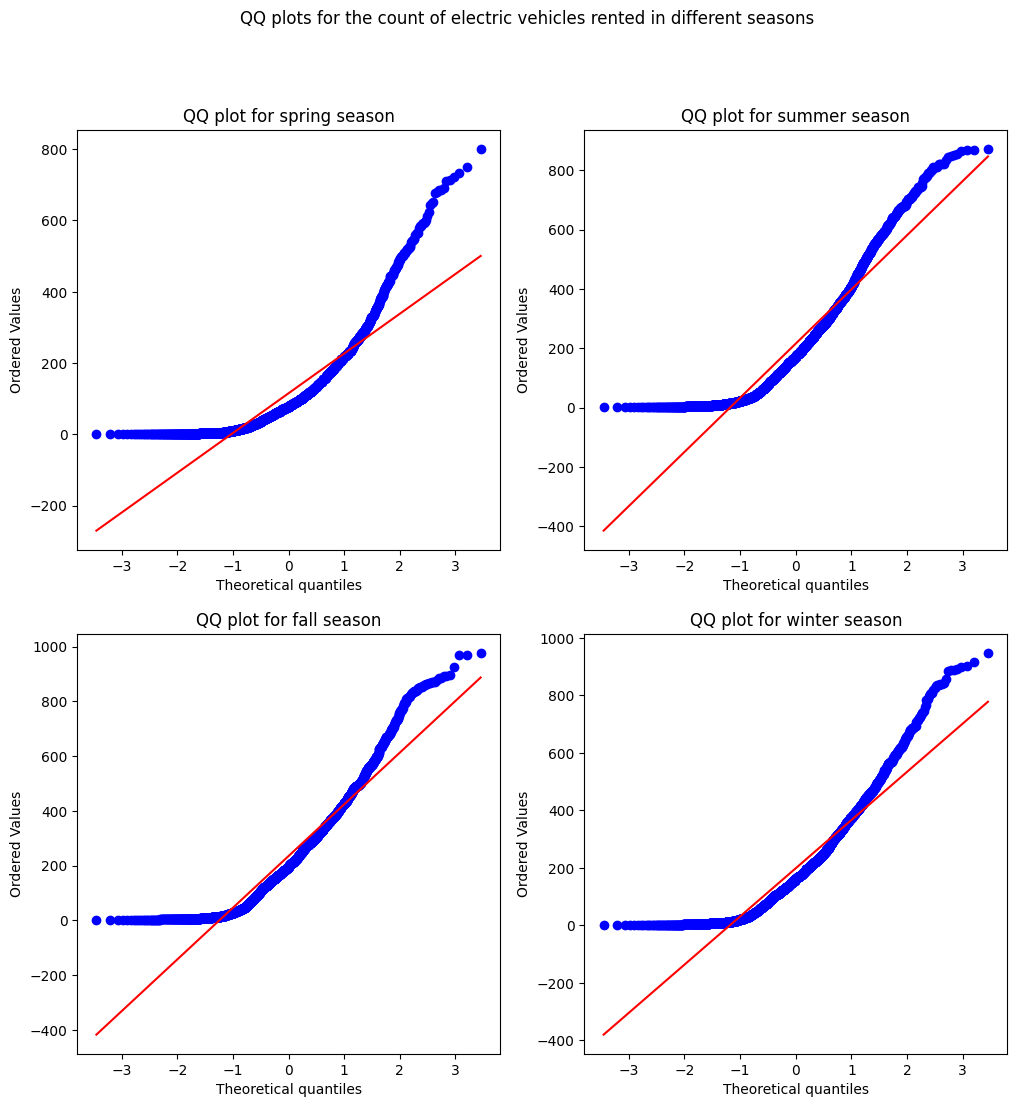

In [221]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming df_season_spring, df_season_summer, df_season_fall, and df_season_winter are already defined
plt.figure(figsize=(12, 12))
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')

# Sample size should not exceed the length of the DataFrame
print('Sample size for spring season:', len(df_season_1))
sample_size = min(2500, len(df_season_1))

plt.subplot(2, 2, 1)
stats.probplot(df_season_1.sample(sample_size), plot=plt, dist='norm')
plt.title('QQ plot for spring season')

# Similarly, sample sizes for other seasons
sample_size = min(2500, len(df_season_2))
plt.subplot(2, 2, 2)
stats.probplot(df_season_2.sample(sample_size), plot=plt, dist='norm')
plt.title('QQ plot for summer season')

sample_size = min(2500, len(df_season_3))
plt.subplot(2, 2, 3)
stats.probplot(df_season_3.sample(sample_size), plot=plt, dist='norm')
plt.title('QQ plot for fall season')

sample_size = min(2500, len(df_season_4))
plt.subplot(2, 2, 4)
stats.probplot(df_season_4.sample(sample_size), plot=plt, dist='norm')
plt.title('QQ plot for winter season')

plt.show()


 - It can be inferred from the above plots that the distributions do not follow normal distribution.

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [222]:
test_stat, p_value = stats.shapiro(df_season_1.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 5.797246274861404e-48
The sample does not follow normal distribution


In [223]:
test_stat, p_value = stats.shapiro(df_season_2.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 1.5179007125046372e-37
The sample does not follow normal distribution


In [224]:
test_stat, p_value = stats.shapiro(df_season_3.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.4190528593344954e-35
The sample does not follow normal distribution


In [225]:
test_stat, p_value = stats.shapiro(df_season_4.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.492385395963885e-38
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [226]:
transformed_df_season_spring = stats.boxcox(df_season_1.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 5.867618289946908e-17
The sample does not follow normal distribution


In [227]:
transformed_df_season_summer = stats.boxcox(df_season_2.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 3.010313848274155e-21
The sample does not follow normal distribution


In [228]:
transformed_df_season_fall = stats.boxcox(df_season_3.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 1.4249843059425422e-21
The sample does not follow normal distribution


In [229]:
transformed_df_season_winter = stats.boxcox(df_season_4.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 2.7037822415314507e-20
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [230]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stats.levene(df_season_1.sample(2500),
                                df_season_2.sample(2500),
                                df_season_3.sample(2500),
                                df_season_4.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 5.158782305864923e-109
The samples do not have  Homogenous Variance


##### Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [231]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = stats.kruskal(df_season_1, df_season_2, df_season_3,df_season_4)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


Comparing p value with significance level 

In [232]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


##### Therefore, the average number of rental bikes is statistically different for different seasons.

[]

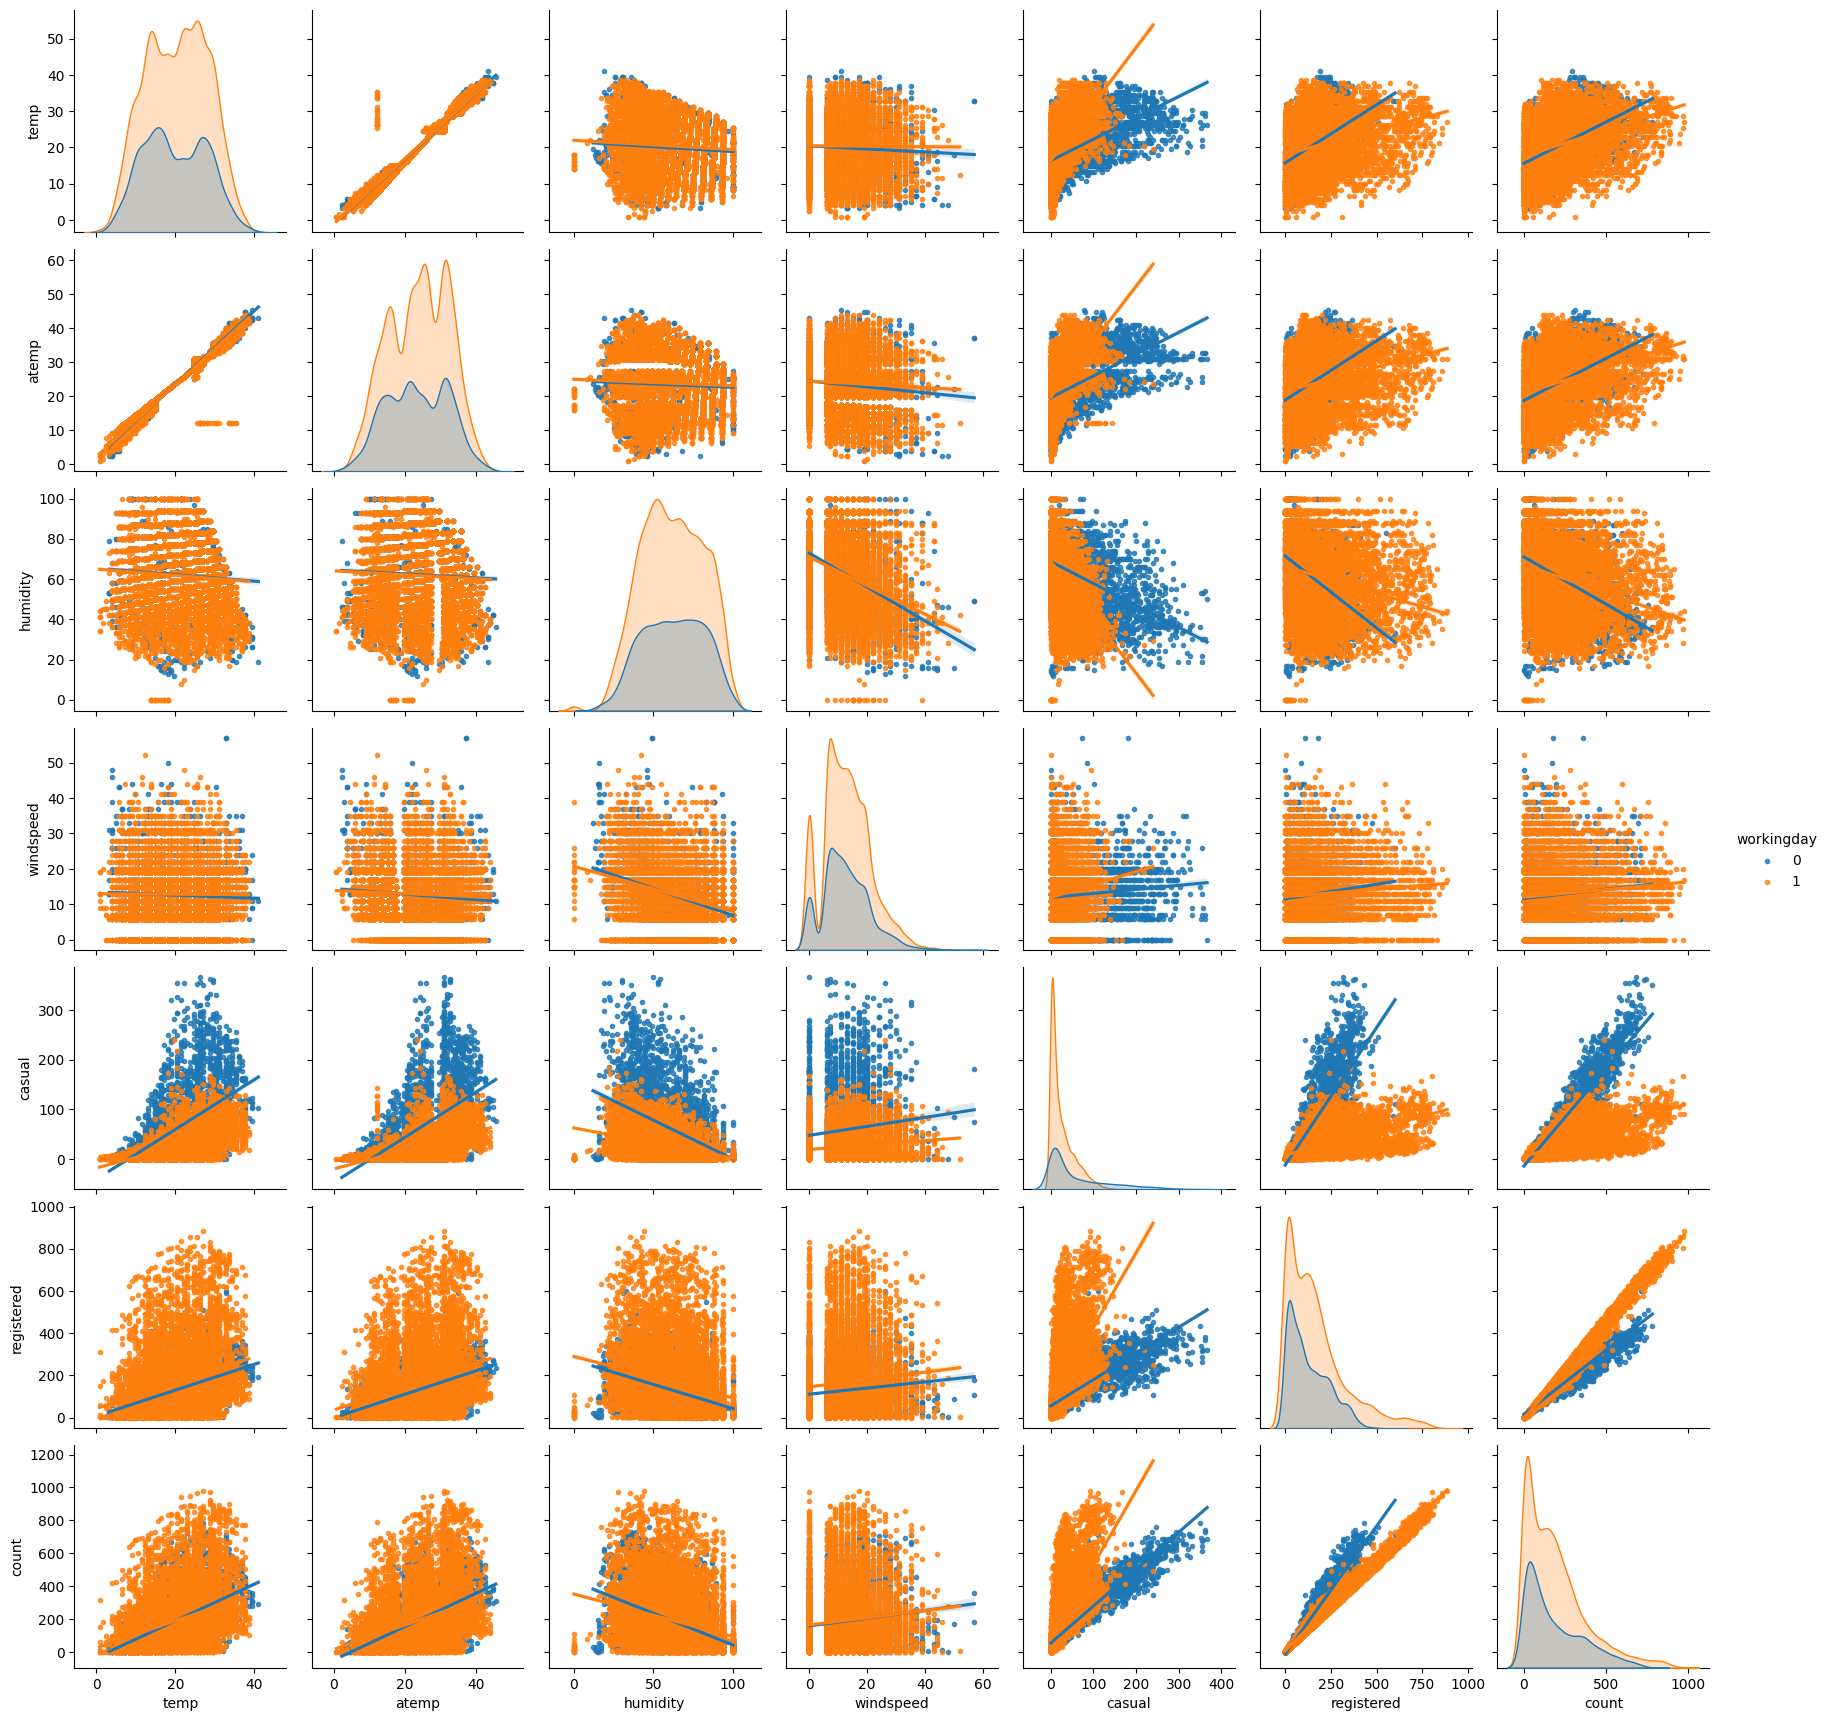

In [233]:
sns.pairplot(data = df, 
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [238]:
new_df = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
corr_data = new_df.corr()
corr_data

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[]

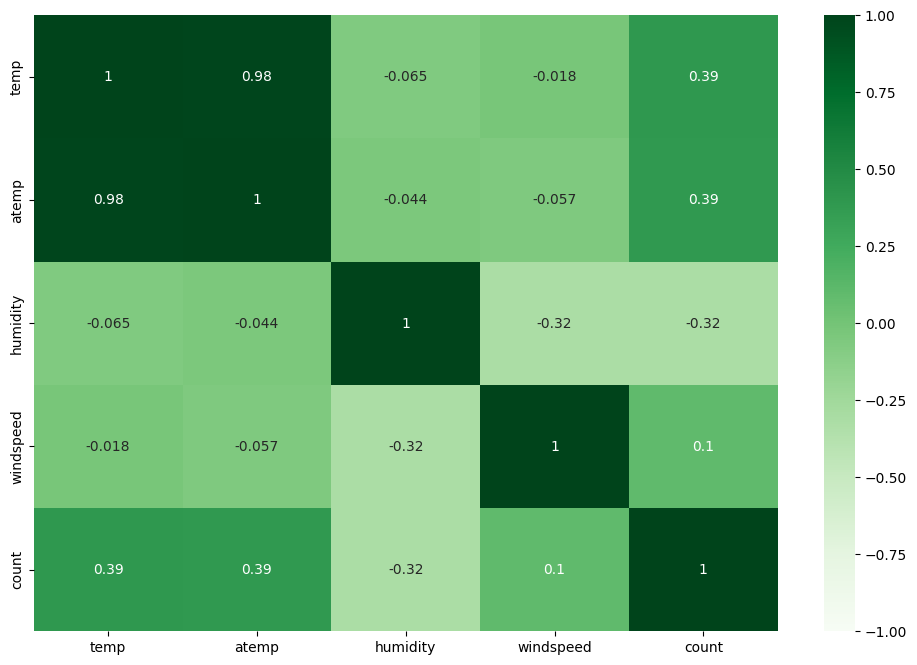

In [239]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

 - Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered] 
 - High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
 - Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
 - Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
 - Negligible correlation exists between all other combinations of columns. 

### Insights

 - The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
 - Out of every 100 users, around 19 are casual users and 81 are registered users.
 - The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
 - There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
  - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
 - There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
 - More than 85 % of the total, windspeed data has a value of less than 20.
 - The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
 - The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
 - There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different weathers.
 - There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different seasons.

### Recommendations

 - **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

 - **Time-based Pricing**: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

 - **Weather-based Promotions**: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

 - **User Segmentation**: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

 - **Optimize Inventory**: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

 - **Improve Weather Data Collection**: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

 - **Customer Comfort**: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

 - **Collaborations with Weather Services**: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

 - **Seasonal Bike Maintenance**: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.
 
 - **Customer Feedback and Reviews**: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.
 
 - **Social Media Marketing**: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.
 
 - **Special Occasion Discounts**: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.
